In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [1]:
import yfinance as yf
import pandas as pd

# Define the assets
assets = ['TSLA', 'BND', 'SPY']

# Fetch data for each asset from 01-Jan-2015 to 31-Jan-2025
data = {asset: yf.download(asset, start="2015-01-01", end="2025-01-31") for asset in assets}

# Display sample data for TSLA
print(data['TSLA'].head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


<Figure size 1000x600 with 0 Axes>

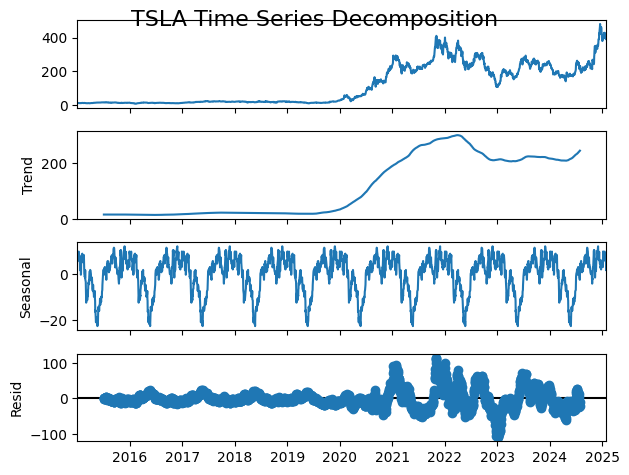

<Figure size 1000x600 with 0 Axes>

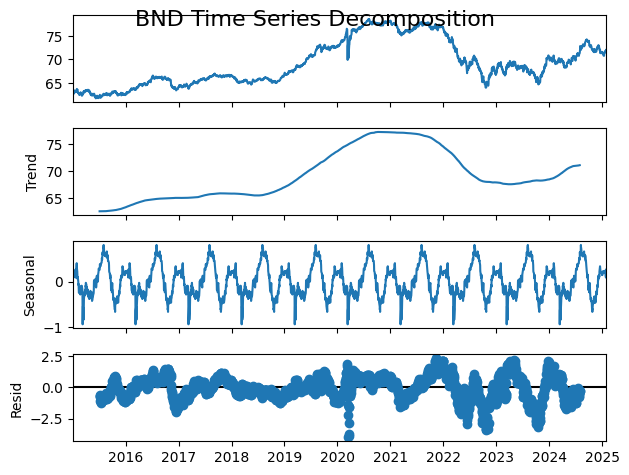

<Figure size 1000x600 with 0 Axes>

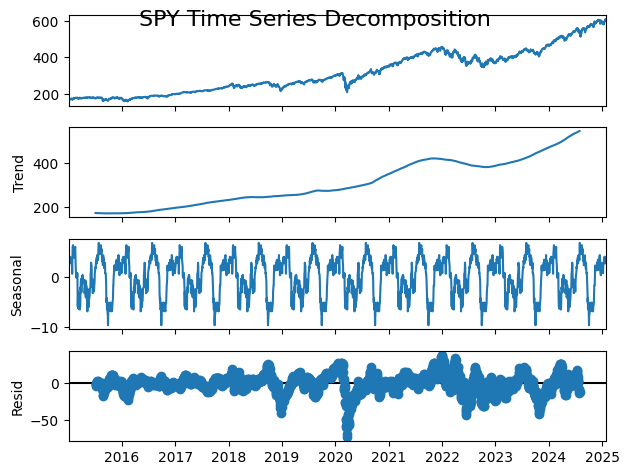

In [5]:


for asset in assets:
    plt.figure(figsize=(10,6))
    decomposition = sm.tsa.seasonal_decompose(data[asset]['Close'], model='additive', period=252)  # 252 trading days per year
    decomposition.plot()
    plt.suptitle(f'{asset} Time Series Decomposition', fontsize=16)
    plt.show()
